Reading data

In [427]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt, seaborn as sns
import pandas_ta, warnings
warnings.filterwarnings('ignore')

In [428]:
# Imporing data

In [429]:
data=pd.read_csv(r"telecom_churn_data.csv")
# raw_data=pd.read_csv(r"D:\Churn Data\Churn-\telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

dropping 'mobile_number ' & 'circle_id'

In [430]:
data.shape

(99999, 226)

In [431]:
data.drop(columns=['mobile_number', 'circle_id'],  inplace=True)

In [432]:
data.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9',}, inplace=True)

In [433]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [434]:

data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=224)

creating churn columns 

In [435]:
for i in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    print(f'for {i} null % is ',data[i].isna().sum())

for total_ic_mou_9 null % is  0
for total_og_mou_9 null % is  0
for vol_2g_mb_9 null % is  0
for vol_3g_mb_9 null % is  0


In [436]:
data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,188.04,72.11,0.00,0.00
2,517.74,124.94,0.00,8.42
3,305.38,362.54,0.00,0.00
4,205.31,104.59,0.00,0.00
...,...,...,...,...
99994,154.43,27.14,0.00,0.00
99995,108.84,106.41,0.00,0.00
99996,0.00,0.00,0.00,0.00
99997,2.21,0.00,85.67,4177.14


In [437]:
data['churn']=((data['total_ic_mou_9']+data['total_og_mou_9']+data['vol_3g_mb_9']+data['vol_2g_mb_9'])==0).astype('int')
# data.drop(columns=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], inplace=True)
data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'vbc_3g_8',
       'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9', 'churn'],
      dtype='object', length=225)

data.head(

In [438]:
data['churn'].value_counts()

churn
0    89808
1    10191
Name: count, dtype: int64

Making list of all columns for month 9 and dropping

In [439]:
month_9=[]
for i in data.columns:
    if i.endswith('9'):
        month_9.append(i)
data.drop(columns=month_9, inplace=True)

# segrating high value customers 
![image.png](attachment:image.png)

# what needs to be done
total_rech_amount= total_mobile_rech_6+total_mobile_rech_7+(av_recharge_data_6*total_rech_data_7)+(av_recharge_data_6*total_rech_data_7)

In [440]:
rech=data.columns[data.columns.str.contains('rech')]
data[rech]=data[rech].fillna(0)


In [441]:
# will drop this because i will need for 3 month

In [442]:
data['total_rech_amount_6_7']=(data['total_rech_amt_6']+data['total_rech_amt_7']+(data['av_rech_amt_data_6']*data['total_rech_data_6'])+(data['av_rech_amt_data_7']*data['total_rech_data_7']))/2
data=data[data['total_rech_amount_6_7']>=data['total_rech_amount_6_7'].quantile(.7)]
data.drop(columns=['total_rech_amount_6_7'], inplace=True)
data.shape

(30001, 170)

droping columns with more than 40 % missing

In [443]:
for i in data.columns:
    if data[i].isna().sum()/data.shape[0]>.4:
        data.drop(columns=i, inplace=True)
data.shape
    # data.drop()

(30001, 158)

In [444]:
data['churn'].value_counts()

churn
0    27560
1     2441
Name: count, dtype: int64

Looking for columns having one category only 

In [445]:
for i in data.columns:
    if data[i].nunique()==  1:
        print(i,data[i].unique())
        data.drop(columns=i, inplace=True)
data.shape

loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
std_og_t2c_mou_6 [nan  0.]
std_og_t2c_mou_7 [nan  0.]
std_og_t2c_mou_8 [ 0. nan]
std_ic_t2o_mou_6 [nan  0.]
std_ic_t2o_mou_7 [nan  0.]
std_ic_t2o_mou_8 [ 0. nan]


(30001, 146)

looking for columns with thier missing nan


In [446]:
data_missing=data.isna().sum()/data.shape[0]*100
data_missing.sort_values(ascending=False)


loc_ic_t2t_mou_8            3.913203
loc_og_t2t_mou_8            3.913203
std_og_t2m_mou_8            3.913203
std_og_t2t_mou_8            3.913203
std_og_mou_8                3.913203
loc_ic_t2f_mou_8            3.913203
loc_og_mou_8                3.913203
std_ic_mou_8                3.913203
loc_og_t2c_mou_8            3.913203
std_ic_t2m_mou_8            3.913203
isd_og_mou_8                3.913203
loc_og_t2f_mou_8            3.913203
spl_og_mou_8                3.913203
loc_og_t2m_mou_8            3.913203
spl_ic_mou_8                3.913203
std_ic_t2f_mou_8            3.913203
std_og_t2f_mou_8            3.913203
roam_og_mou_8               3.913203
std_ic_t2t_mou_8            3.913203
ic_others_8                 3.913203
roam_ic_mou_8               3.913203
isd_ic_mou_8                3.913203
offnet_mou_8                3.913203
og_others_8                 3.913203
loc_ic_mou_8                3.913203
loc_ic_t2m_mou_8            3.913203
onnet_mou_8                 3.913203
s

chnaged for new set

In [447]:
for col in data.columns:
    data = data[~data[col].isna()]
    
# Re-check missing values
round(data.isna().sum() / len(data) * 100, 2).sort_values(ascending=False)

arpu_6                      0.0
total_rech_data_7           0.0
total_rech_amt_6            0.0
total_rech_amt_7            0.0
total_rech_amt_8            0.0
max_rech_amt_6              0.0
max_rech_amt_7              0.0
max_rech_amt_8              0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
last_day_rch_amt_6          0.0
last_day_rch_amt_7          0.0
last_day_rch_amt_8          0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
total_rech_num_8            0.0
total_rech_num_7            0.0
total_rech_num_6            0.0
spl_ic_mou_6                0.0
std_ic_mou_6                0.0
std_ic_mou_7                0.0
std_ic_mou_8                0.0
total_ic_mou_6              0.0
total_ic_mou_7              0.0
total_ic_mou_8              0.0
spl_ic_mou_7                0.0
ic_others_8                 0.0
spl_ic_mou_8                0.0
isd_ic_mou_6                0.0
isd_ic_m

In [448]:
# original is this
# data.fillna(0, inplace=True)
# data_missing=data.isna().sum()/data.shape[0]*100
# data_missing.sort_values(ascending=False)

In [449]:
data.describe(percentiles=[.8,.85,.90,.95])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,16.267511,12.921422,13.032309,26.82

In [450]:
data.churn.nunique()

2

from above we can see that above 90 % data is mostly outliers later confirmed by boxplot  as well

In [451]:
# **Note** 90% is cchosen after multiple attempts

In [452]:
import pandas as pd

# Assuming 'data' is your DataFrame
col = data.select_dtypes(include=['number']).columns  # Select only numeric columns
for i in col:
    if i  !='churn':
        data[i] = data[data[i] <= data[i].quantile(0.9)][i]


In [453]:
data.churn.nunique()

2

In [454]:
data['aon']=data['aon']/365

In [455]:
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25654.000000,25653.000000,25654.000000,25653.000000,25653.000000,25653.000000,25653.000000,25654.000000,25655.000000,25654.000000,25653.000000,25654.000000,25658.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25664.000000,25653.000000,25655.000000,25654.000000,25653.000000,25653.000000,26290.0,26376.0,26647.0,25655.000000,25653.000000,25653.000000,25661.000000,28356.0,28333.0,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25654.000000,25653.0000,25653.000000,25653.000000,25654.000000,25654.000000,25653.000000,25653.000000,25653.000000,25653.000000,25654.000000,25653.000000,25654.000000,25653.000000,25654.000000,25654.000000,25655.000000,25658.000000,25653.000000,25654.000000,25653.000000,25653.000000,25653.000000,25653.000000,25742.000000,26566.0,25962.0,25654.000000,25653.000000,25654.000000,25676.000000,25672.000000,25656.000000,25944.000000,25860.000000,25783.000000,25657.000000,25660.000000,25656.000000,25711.000000,25716.000000,25838.000000,25729.000000,25665.000000,25665.000000,26252.000000,25662.000000,26136.000000,28004.000000,27961.000000,27998.000000,26115.000000,26184.000000,25972.000000,26265.000000,25962.000000,26245.000000,25861.000000,25681.000000,25758.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,25653.000000,27946.000000,27841.000000,28103.000000,26200.000000,26233.000000,26049.000000,27418.000000,27219.000000,27332.000000,27527.000000,27401.000000,25924.0,25653.000000,25653.000000,25653.000000,25653.000000,28504.000000
mean,463.914545,470.906938,420.853577,143.493666,147.671878,123.221487,256.750747,262.038277,229.359644,1.204169,0.449169,0.591252,2.262601,0.983496,1.086172,38.537318,39.324588,36

In [456]:
data.churn.nunique()

2

Seprating churn month and traing data

In [457]:
data.fillna(0, inplace=True)
data_missing=data.isna().sum()/data.shape[0]*100
data_missing.sort_values(ascending=False)

arpu_6                      0.0
total_rech_data_7           0.0
total_rech_amt_6            0.0
total_rech_amt_7            0.0
total_rech_amt_8            0.0
max_rech_amt_6              0.0
max_rech_amt_7              0.0
max_rech_amt_8              0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
last_day_rch_amt_6          0.0
last_day_rch_amt_7          0.0
last_day_rch_amt_8          0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
total_rech_num_8            0.0
total_rech_num_7            0.0
total_rech_num_6            0.0
spl_ic_mou_6                0.0
std_ic_mou_6                0.0
std_ic_mou_7                0.0
std_ic_mou_8                0.0
total_ic_mou_6              0.0
total_ic_mou_7              0.0
total_ic_mou_8              0.0
spl_ic_mou_7                0.0
ic_others_8                 0.0
spl_ic_mou_8                0.0
isd_ic_mou_6                0.0
isd_ic_m

In [458]:
data.churn.value_counts()


churn
0    26908
1     1596
Name: count, dtype: int64

In [459]:
data.drop(columns=data.select_dtypes('O'), inplace=True)

EDA

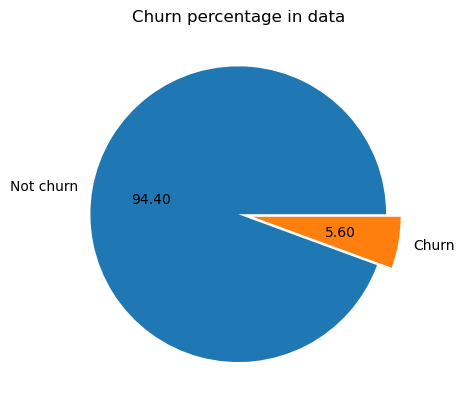

In [460]:
plt.pie(x=data['churn'].value_counts(), explode=[0,.1], labels=['Not churn','Churn'], autopct='%.2f')
plt.title('Churn percentage in data');

Churn is  5.6 % for High value customers

defining outgoing data based on month 

In [461]:
og_relation_6=data.columns[(data.columns.str.contains('og_')) & (data.columns.str.contains('_6'))]
og_relation_7=data.columns[(data.columns.str.contains('og_')) & (data.columns.str.contains('_7'))]
og_relation_8=data.columns[(data.columns.str.contains('og_')) & (data.columns.str.contains('_8'))]

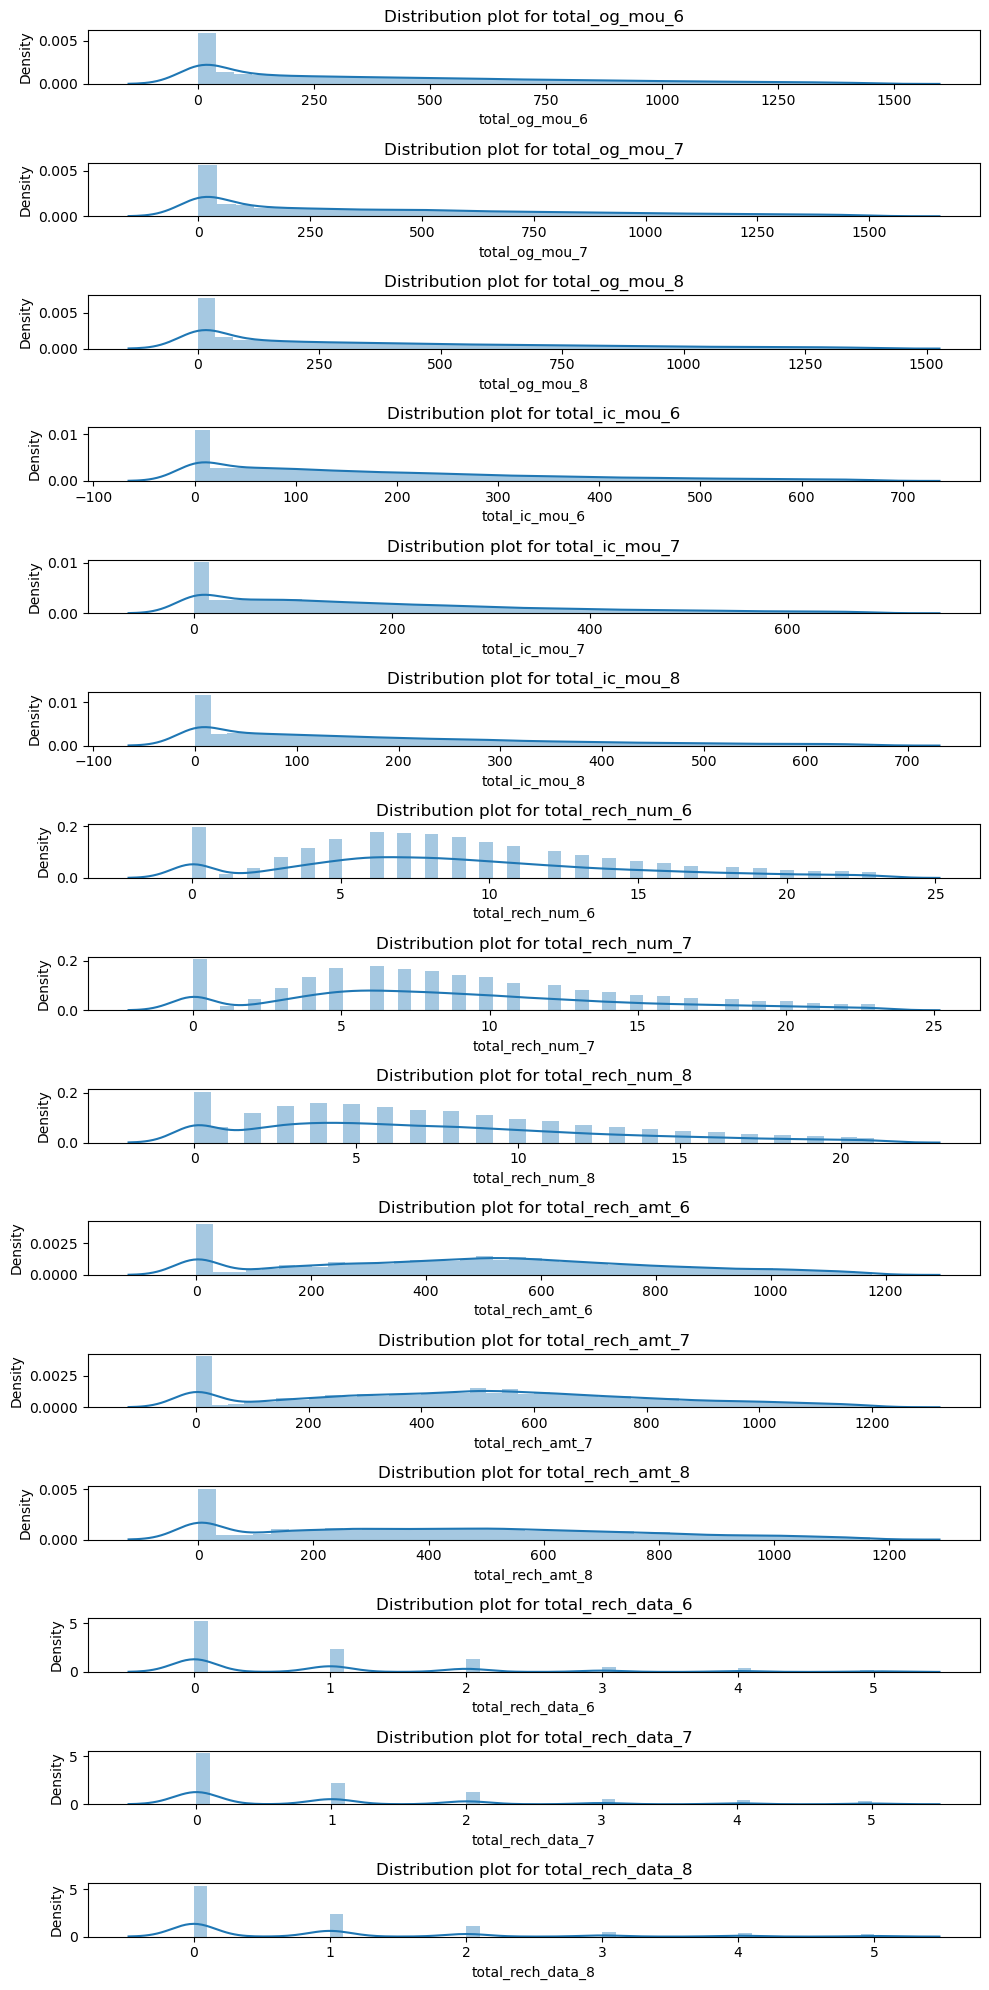

In [462]:
total_col=data.columns[data.columns.str.contains('total')]
fig, axes=plt.subplots(nrows=len(total_col), figsize=(10,20))
for i, cat in enumerate(total_col):
    axes[i].set_title(f'Distribution plot for {cat}')
    sns.distplot(data[cat], ax=axes[i])
    
plt.tight_layout() ;

In [463]:
#We can observe that all three months exhibit more or less the same pattern, indicating highly similar behavior by customers. This similarity may lead to the model being overfit.
#The data is highly skewed, with 0 having the highest frequency, whether it is total incoming/outgoing calls or in terms of data usage.
#for 8 th month there is drop in all parametrs parametrs compared to 6 & 7 month indicating some issues with services 

Most of the data is highly skewed 

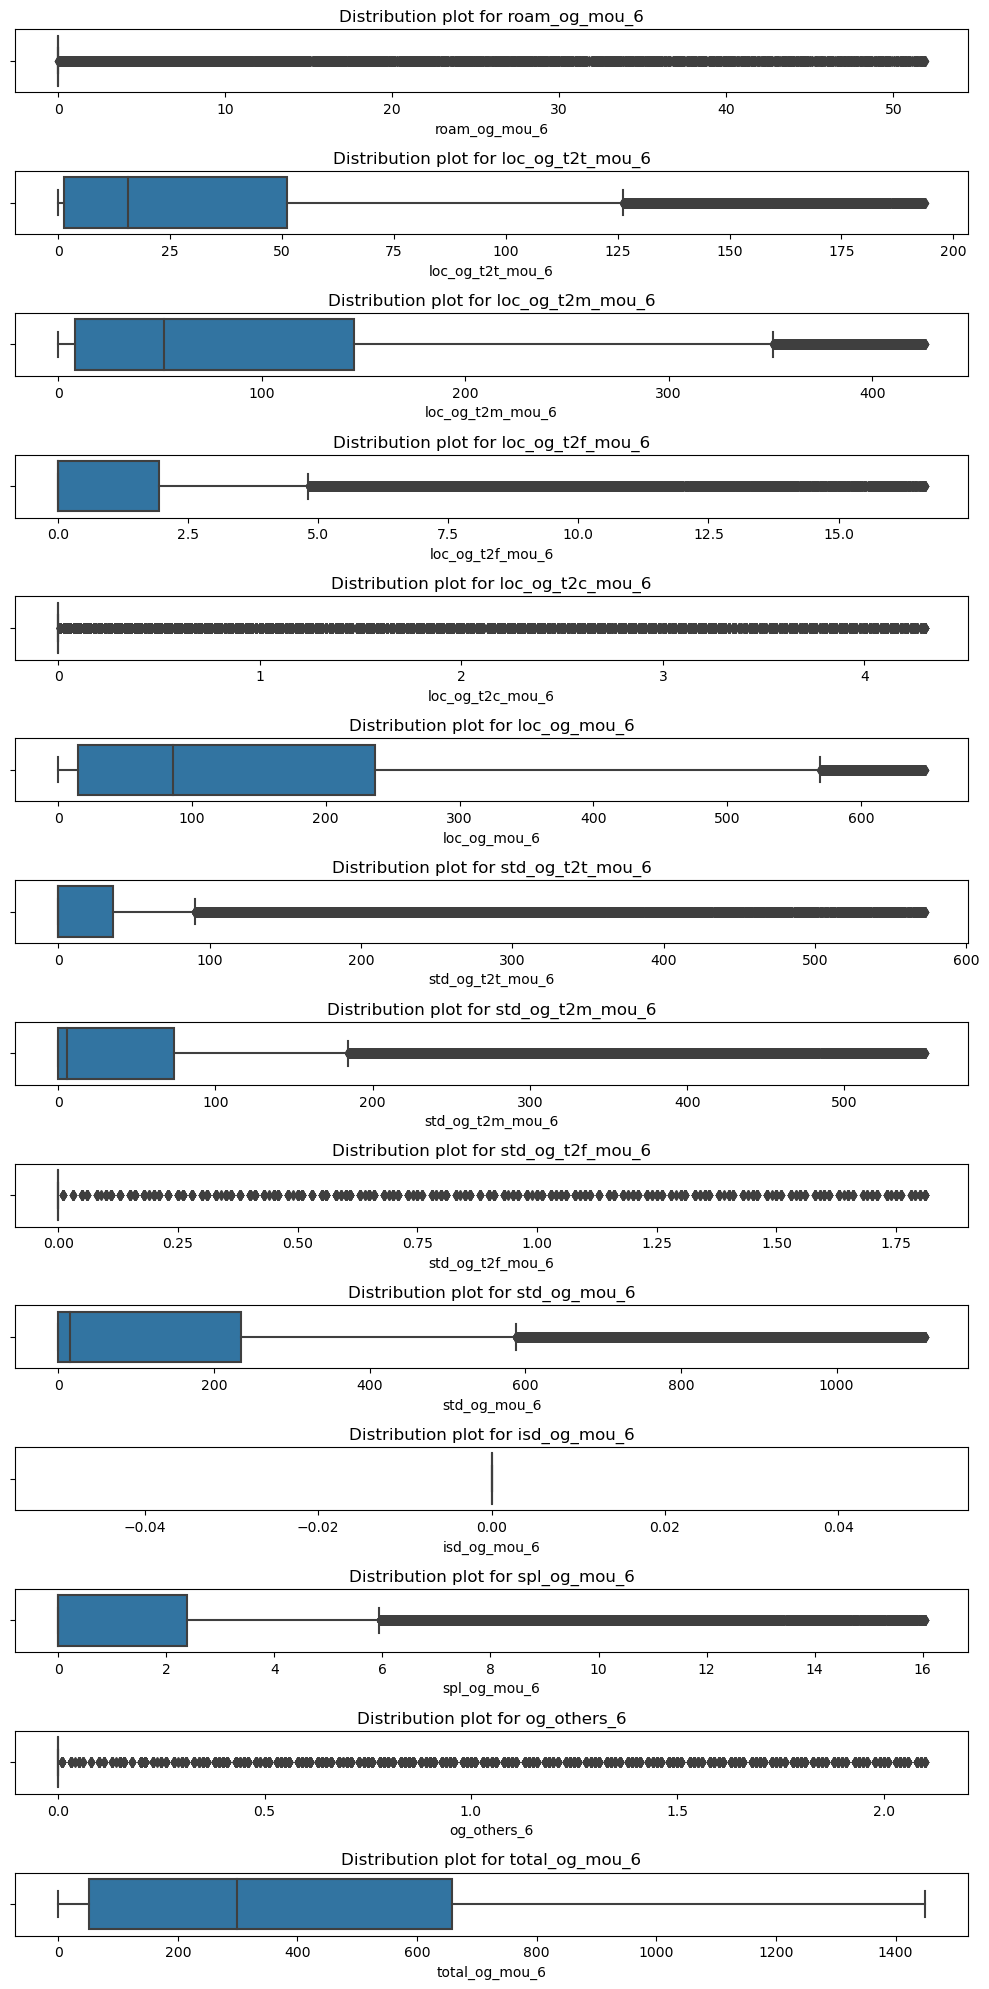

In [464]:
fig, axes= plt.subplots(nrows=len(og_relation_6), figsize=(10,20))
for i,cat in enumerate(og_relation_6):
    sns.boxplot(x=data[cat],ax=axes[i])
    axes[i].set_title(f'Distribution plot for {cat}')
    
plt.tight_layout()


In [465]:
# In terms of outgoing calls, almost all the features related to outgoing calls exhibit outliers specially calls to other networks, calls made in roaming, and calls to fixed lines. 
# Outgoing ISD calls in month 6 have a mean of zero.
# for the rest further investigation needs to be done

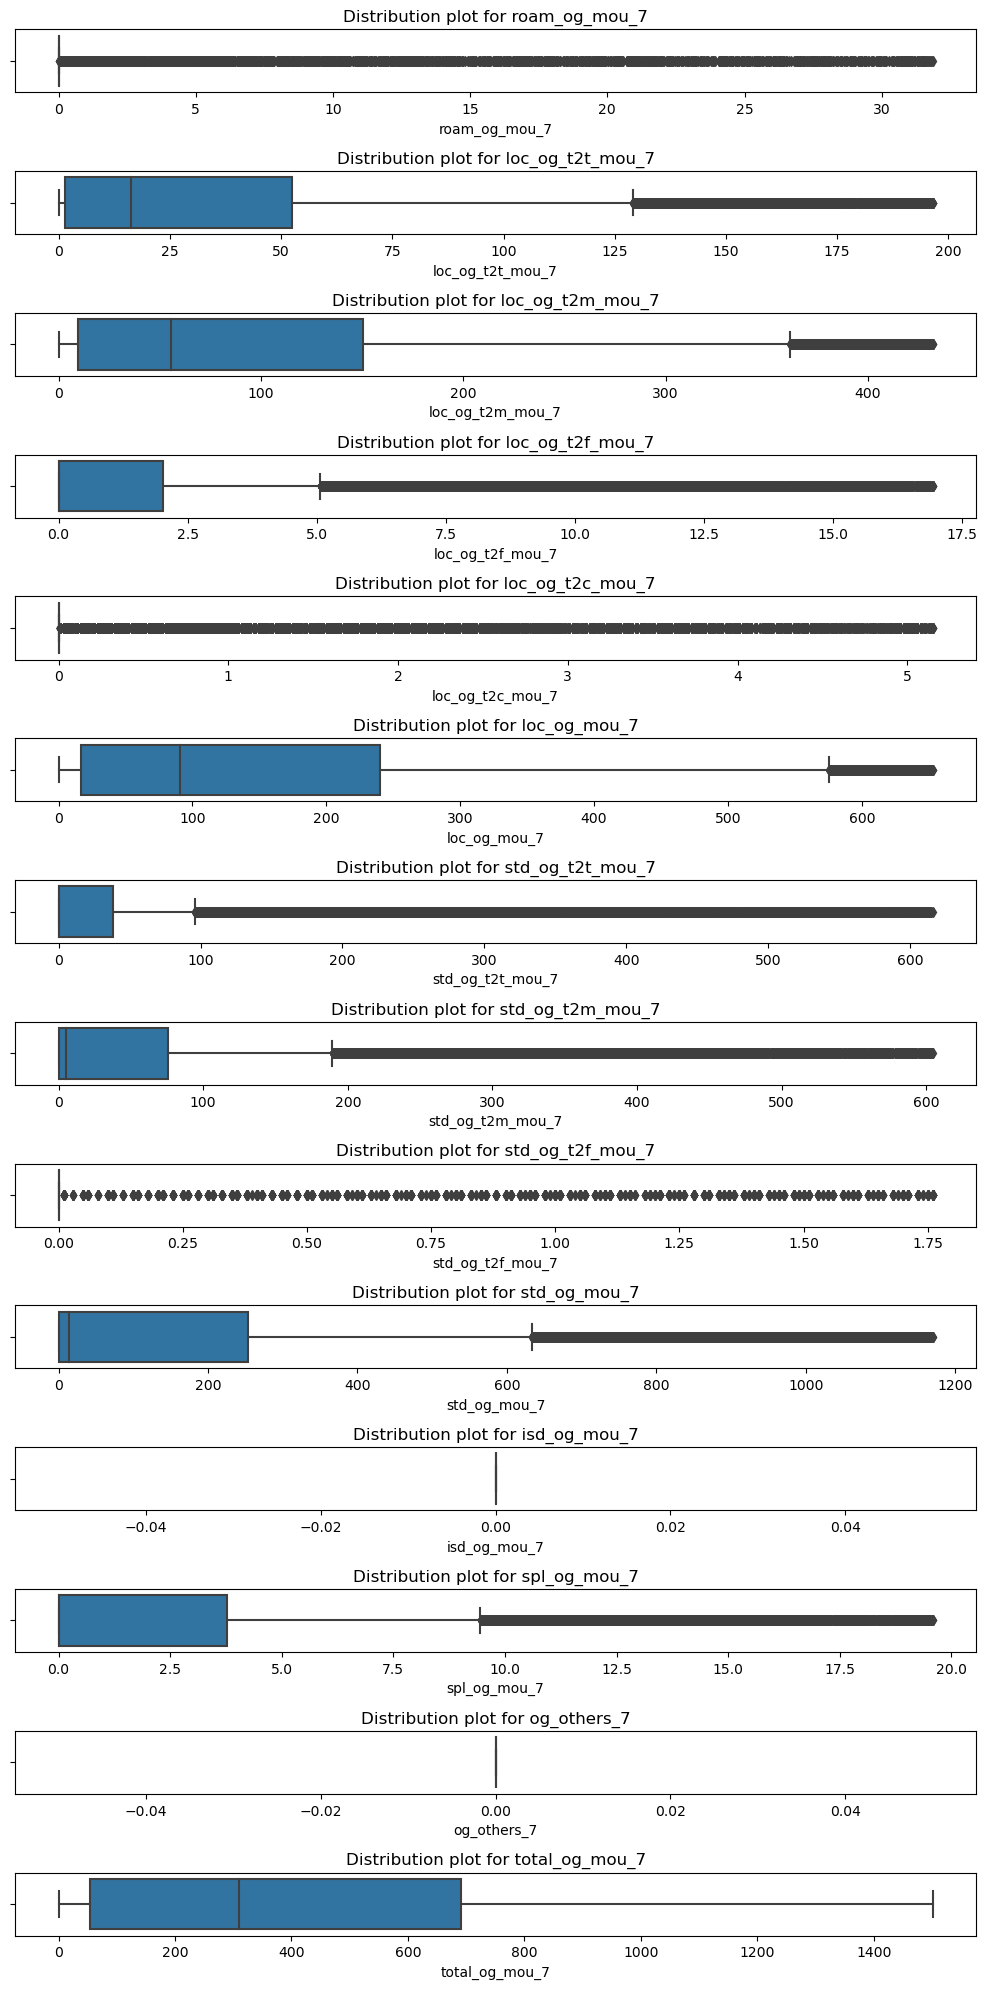

In [466]:
fig, axes= plt.subplots(nrows=len(og_relation_7), figsize=(10,20))
for i,cat in enumerate(og_relation_7):
    sns.boxplot(x=data[cat],ax=axes[i])
    axes[i].set_title(f'Distribution plot for {cat}')
plt.tight_layout()

In [467]:
# In terms of outgoing calls, almost all the features related to outgoing calls exhibit outliers simiar to month 6
# calls especially to other networks, calls made in roaming, and calls to fixed lines. 
# it was obsedved in past month as well that local calls have longer durations(near 80) while STD are kept short (near 0 visually not by stats)
#this imply there is diffrent cost apply for loc and std calls
# for the rest further investigation needs to be done

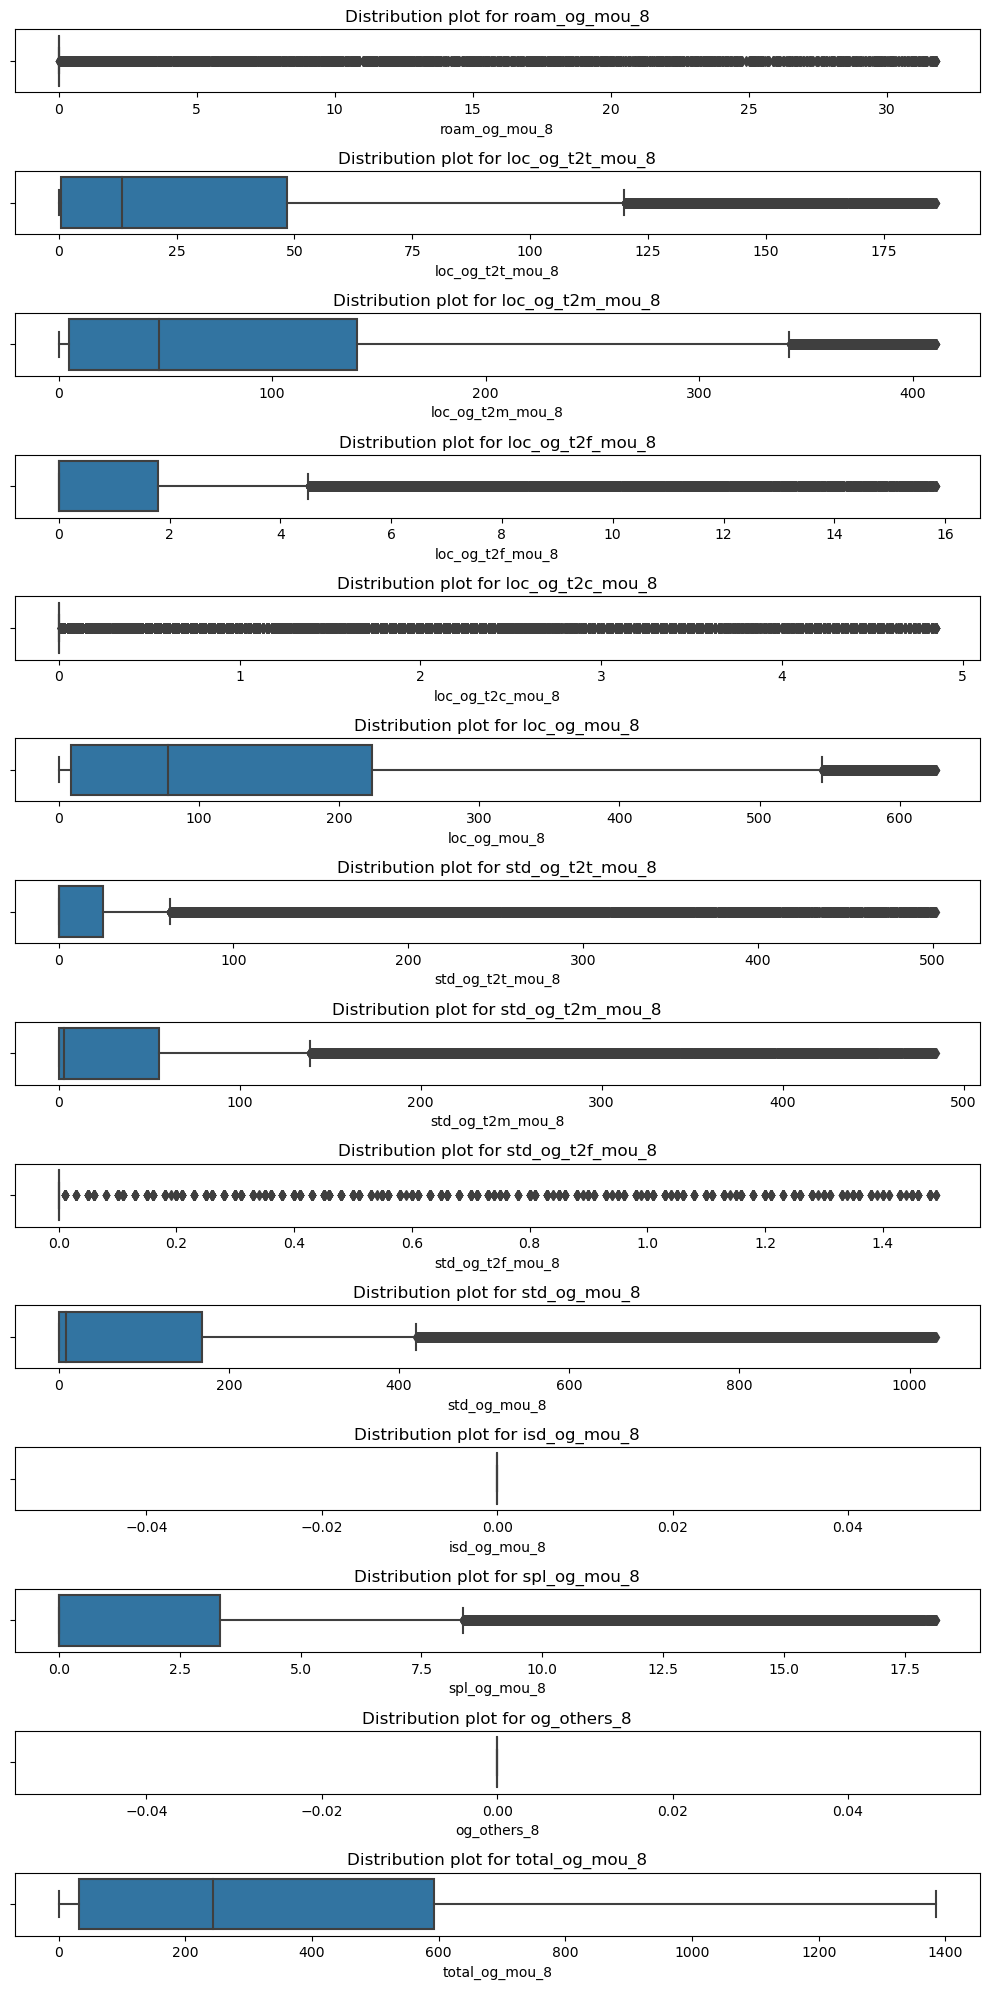

In [468]:
fig, axes= plt.subplots(nrows=len(og_relation_8), figsize=(10,20))
for i,cat in enumerate(og_relation_8):
    sns.boxplot(x=data[cat],ax=axes[i])
    axes[i].set_title(f'Distribution plot for {cat}')
plt.tight_layout()

In [469]:
# Roaming outgoing for month 8, local calls outgoing to call centers and fixed lines still have significant outliers, similar to months 6 and 7. 
# From the past three months' data, it is evident that people are not making many ISD calls. 
# The average total call minutes, whether outgoing or incoming, have decreased compared to the average outgoing calls for month 7.

Plotting heatmap to detect the collinearity in Outgoing calls in 6, 7 , 8 month

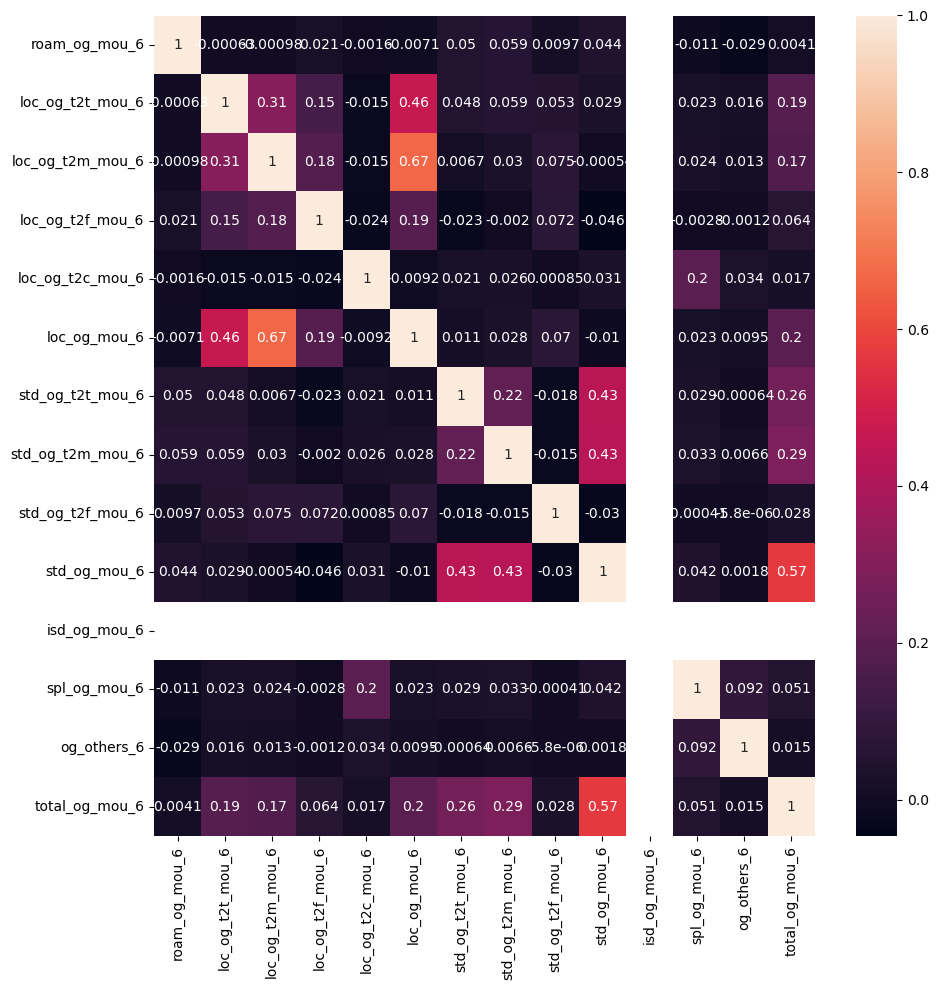

In [470]:

plt.figure(figsize=(10,10))
sns.heatmap(data[og_relation_6].corr(), annot=True)
plt.tight_layout();

In [471]:
# as expected ISD calls have no corelation with orders 

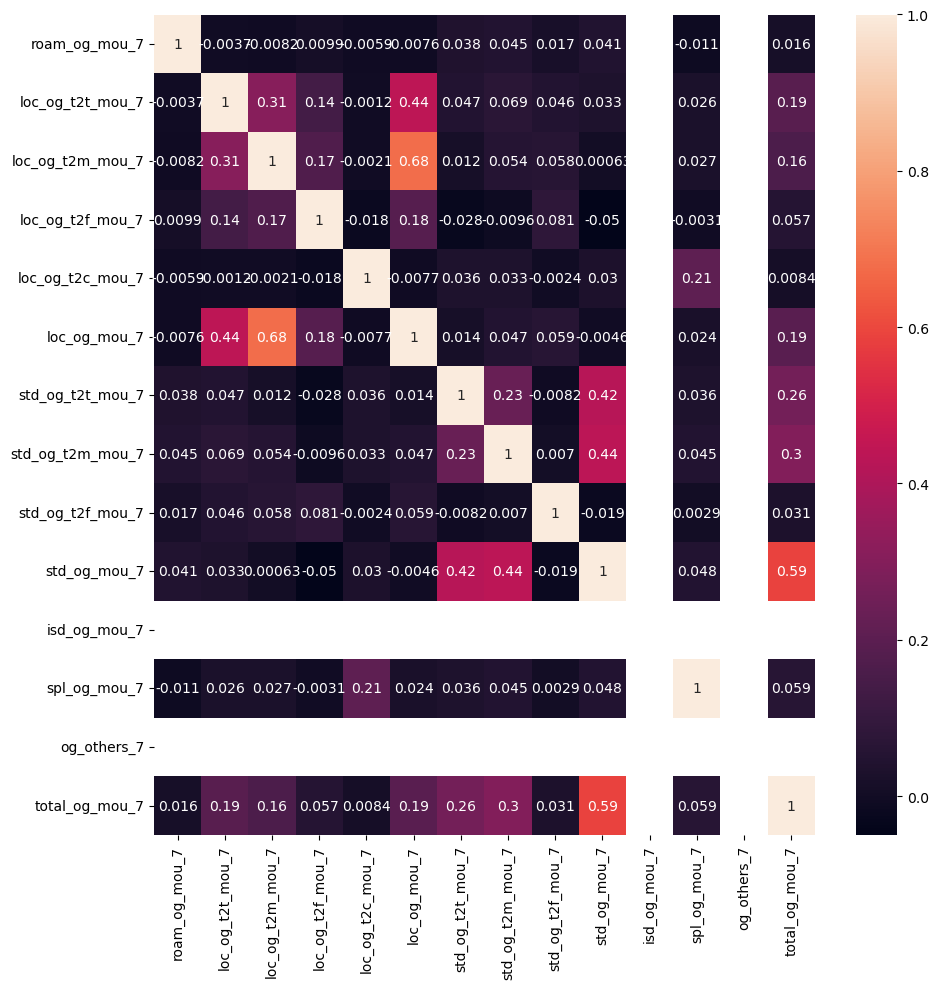

In [472]:

plt.figure(figsize=(10,10))
sns.heatmap(data[og_relation_7].corr(), annot=True)
plt.tight_layout();

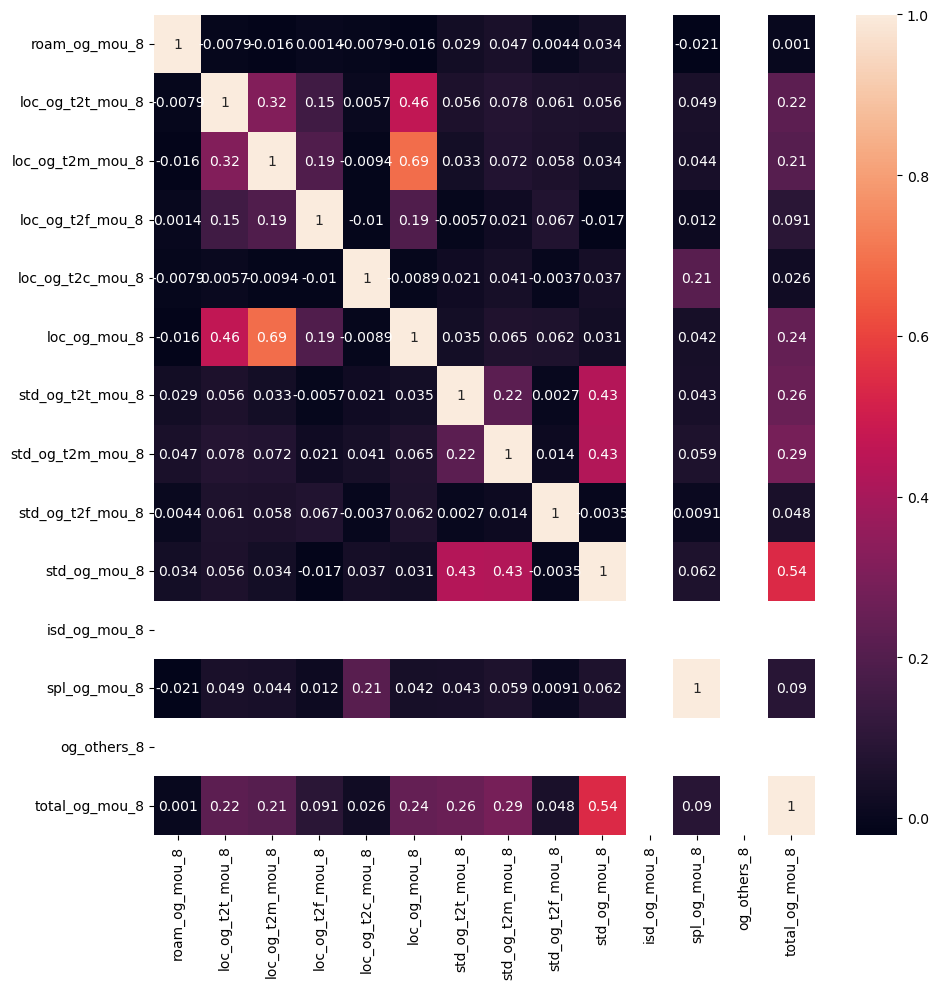

In [473]:

plt.figure(figsize=(10,10))
sns.heatmap(data[og_relation_8].corr(), annot=True)
plt.tight_layout();

all these 3 have same corellated columns

Finding and droping the columns that are highly correlated with each other (> 0.5)

In [474]:
corr = data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

loc_og_mou_6        loc_og_t2m_mou_6     0.668624
loc_og_mou_7        loc_og_t2m_mou_7     0.677551
loc_og_mou_8        loc_og_t2m_mou_8     0.688492
std_og_t2t_mou_7    onnet_mou_7          0.618111
loc_ic_mou_6        loc_ic_t2m_mou_6     0.668821
loc_ic_mou_7        loc_ic_t2m_mou_7     0.667018
loc_ic_mou_8        loc_ic_t2m_mou_8     0.682579
std_ic_mou_8        std_ic_t2m_mou_8     0.607954
total_ic_mou_6      loc_ic_mou_6         0.719210
total_ic_mou_7      loc_ic_mou_7         0.699532
total_ic_mou_8      loc_ic_mou_8         0.726473
total_rech_amt_6    arpu_6               0.796926
total_rech_amt_7    arpu_7               0.789134
total_rech_amt_8    arpu_8               0.815692
max_rech_data_7     max_rech_data_6      0.676806
max_rech_data_8     max_rech_data_6      0.622859
                    max_rech_data_7      0.689232
count_rech_2g_6     total_rech_data_6    0.680544
count_rech_2g_7     total_rech_data_7    0.769853
count_rech_2g_8     total_rech_data_8    0.657966


In [475]:
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
data.drop(drop_col_corr, axis=1, inplace=True)
data.shape

(28504, 101)

In [476]:
# com=['loc_og_t2t_mou_','loc_og_t2m_mou_','loc_og_t2f_mou_','loc_og_mou_','total_og_mou_']
# drop_col=[]
# for i in com:
#     drop_col.append(i+'6')
#     drop_col.append(i+'7')
#     drop_col.append(i+'8')
# data.drop(columns=drop_col, inplace=True)    
# # data.drop(columns=['loc_og_t2t_mou_8'], inplace=True)

In [477]:
l=data.columns.to_list()
nl=[]
for i in l:
    if i[-1].isdigit():
        if i[-1]!='8':
            nl.append(i[:-1])
            nl=list(set(nl))
print(nl)


['total_rech_num_', 'arpu_', 'onnet_mou_', 'og_others_', 'spl_ic_mou_', 'std_ic_t2f_mou_', 'loc_og_t2c_mou_', 'ic_others_', 'count_rech_2g_', 'offnet_mou_', 'vbc_3g_', 'roam_ic_mou_', 'last_day_rch_amt_', 'count_rech_3g_', 'av_rech_amt_data_', 'std_ic_mou_', 'spl_og_mou_', 'max_rech_amt_', 'max_rech_data_', 'loc_og_mou_', 'monthly_2g_', 'isd_ic_mou_', 'std_og_t2f_mou_', 'isd_og_mou_', 'loc_ic_mou_', 'roam_og_mou_', 'std_og_mou_', 'sachet_3g_', 'std_ic_t2t_mou_', 'total_rech_data_', 'monthly_3g_', 'sachet_2g_', 'vol_2g_mb_']


enginerring new features to in form of average columns for month 6 & 7 and droping individual data of 6 & 7

In [478]:

for i in nl:
    
    # for k in 
    # if agg[-1]!='8':
    #     print(1)
    j='av_'+i+'6_7'
    k=i+'6'
    l=i+'7'
    data[j]=(data[k]+data[l])/2
    data.drop(columns=k, inplace=True)
    data.drop(columns=l, inplace=True)
    
data


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,av_total_rech_num_6_7,av_arpu_6_7,av_onnet_mou_6_7,av_og_others_6_7,av_spl_ic_mou_6_7,av_std_ic_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_ic_others_6_7,av_count_rech_2g_6_7,av_offnet_mou_6_7,av_vbc_3g_6_7,av_roam_ic_mou_6_7,av_last_day_rch_amt_6_7,av_count_rech_3g_6_7,av_av_rech_amt_data_6_7,av_std_ic_mou_6_7,av_spl_og_mou_6_7,av_max_rech_amt_6_7,av_max_rech_data_6_7,av_loc_og_mou_6_7,av_monthly_2g_6_7,av_isd_ic_mou_6_7,av_std_og_t2f_mou_6_7,av_isd_og_mou_6_7,av_loc_ic_mou_6_7,av_roam_og_mou_6_7,av_std_og_mou_6_7,av_sachet_3g_6_7,av_std_ic_t2t_mou_6_7,av_total_rech_data_6_7,av_monthly_3g_6_7,av_sachet_2g_6_7,av_vol_2g_mb_6_7
7,0.000,52.29,325.91,0.0,0.0,0.00,255.79,0.0,77.84,0.0,6.50,0.0,188.04,0.00,0.00,0.00,0.0,0.00,0.00,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.197260,57.74,1,5.0,0.0000,56.260,0.00,0.105,0.000,0.000,0.000,0.0,510.295,19.060,8.115,0.0,0.0,0.0,0.000,2.250,0.0,0.0,478.035,0.0,8.295,0.0,0.0,391.555,18.165,68.000,0.0,5.915,0.0,0.0,0.0,0.000
8,137.362,35.08,136.48,0.0,0.0,0.00,63.04,0.0,98.28,0.0,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14.0,30.0,10.0,3.0,23.0,3.0,0.0,69.0,0.03,0.0,3.0,0.0,0.0,0.863014,21.03,0,20.0,435.4720,382.360,0.00,0.000,0.000,0.000,0.000,1.0,87.645,61.080,0.000,25.0,0.0,88.5,13.545,0.000,122.0,77.0,333.135,0.5,0.000,0.0,0.0,52.630,0.000,136.870,0.0,0.290,1.0,0.0,0.5,178.000
21,637.760,85.14,0.00,0.0,0.0,0.00,129.74,0.0,938.79,0.0,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.972603,0.00,0,11.0,556.1030,117.260,0.00,0.000,0.000,0.000,0.000,0.0,827.305,0.000,0.000,25.0,0.0,0.0,62.985,0.000,50.0,0.0,95.565,0.0,0.000,0.0,0.0,106.505,0.000,848.990,0.0,10.020,0.0,0.0,0.0,0.000
23,366.966,33.58,205.89,0.0,0.0,0.00,182.14,0.0,39.61,0.0,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,0.00,4.0,179.0,0.0,2.0,179.0,0.0,0.0,270.0,0.01,0.0,0.0,1.0,0.0,1.654795,40.45,0,4.0,134.1235,49.810,0.00,0.000,0.000,0.000,0.000,0.0,87.385,25.930,0.000,89.5,0.0,0.0,8.915,0.050,89.5,89.5,132.795,0.0,0.000,0.0,0.0,145.520,0.000,4.355,0.0,0.255,1.0,0.0,0.0,0.240
33,409.230,0.00,0.00,0.0,0.0,0.56,0.00,0.0,0.00,0.0,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7.97,0.0,0.0,1.0,0.0,3.638356,358.10,0,10.5,488.5100,0.000,0.00,0.000,0.595,0.000,0.325,0.0,0.000,0.000,0.000,0.0,0.0,0.0,4.420,0.000,126.0,126.0,0.000,0.0,0.000,0.0,0.0,2.180,0.000,0.000,0.5,1.455,2.5,0.0,0.0,72.405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,393.474,103.24,61.44,0.0,0.0,0.00,150.59,0.0,14.01,0.0,0.08,0.0,402.58,17.36,0.00,17.36,0.0,0.00,0.51,3.0,252.0,130.0,1.0,252.0,0.0,1.0,252.0,112.07,0.0,0.0,1.0,0.0,1.295890,0.00,0,3.0,319.8605,53.860,0.00,0.065,0.000,1.955,0.075,0.0,42.110,0.000,0.000,0.0,1.0,252.0,53.310,5.555,252.0,252.0,87.340,0.0,0.030,0.0,0.0,358.135,0.000,3.075,0.0,0.455,1.0,1.0,0.0,77.915
99984,118.707,5.71,18.26,0.0,0.0,0.00,16.69,0.0,0.00,0.0,7.28,0.0,102.81,0.00,0.00,0.00,0.0,0.00,0.00,9.0,30.0,25.0,5.0,25.0,0.0,0.0,117.0,202.22,0.0,0.0,0.0,0.0,2.246575,0.00,0,9.0,265.7800,302.910,0.53,0.000,1.015,0.000,0.000,2.5,39.660,0.000,0.000,12.5,0.0,137.5,2.560,7.690,100.0,100.0,322.125,0.5,0.000,0.0,0.0,103.810,0.000,1.995,0.0,0.000,2.5,0.0,2.0,0.000
99986,564.334,0.00,595.44,0.0,0.0,0.00,0.00,0.0,145.79,0.0,9.15,0.0,0.00,0.00,0.45,24.16,0.0,0.00,0.

Splititng into test & train data

In [479]:
from sklearn.model_selection import train_test_split

In [480]:
y = data.pop('churn')
X = data
X,X_test, y, y_test=train_test_split(X,y, test_size=.3, random_state=42)
print(X.shape,'\n',y.shape)

(19952, 67) 
 (19952,)


In [481]:
X.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,av_total_rech_num_6_7,av_arpu_6_7,av_onnet_mou_6_7,av_og_others_6_7,av_spl_ic_mou_6_7,av_std_ic_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_ic_others_6_7,av_count_rech_2g_6_7,av_offnet_mou_6_7,av_vbc_3g_6_7,av_roam_ic_mou_6_7,av_last_day_rch_amt_6_7,av_count_rech_3g_6_7,av_av_rech_amt_data_6_7,av_std_ic_mou_6_7,av_spl_og_mou_6_7,av_max_rech_amt_6_7,av_max_rech_data_6_7,av_loc_og_mou_6_7,av_monthly_2g_6_7,av_isd_ic_mou_6_7,av_std_og_t2f_mou_6_7,av_isd_og_mou_6_7,av_loc_ic_mou_6_7,av_roam_og_mou_6_7,av_std_og_mou_6_7,av_sachet_3g_6_7,av_std_ic_t2t_mou_6_7,av_total_rech_data_6_7,av_monthly_3g_6_7,av_sachet_2g_6_7,av_vol_2g_mb_6_7
count,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.0,19952.000000,19952.0,19952.000000,19952.000000,19952.000000,19952.000000,19952.0,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.0,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.0,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000,19952.000000
mean,377.825876,110.930327,206.987557,0.531953,0.973749,0.273827,139.740792,0.033311,142.427832,0.0,2.458657,0.0,139.917208,3.094202,0.230921,16.582914,0.0,0.543182,0.065488,7.202386,113.195168,56.523607,0.867081,62.780072,0.532729,0.139234,67.778379,26.803205,0.128007,0.394096,0.100742,0.0,2.497827,55.502862,8.833951,421.197741,131.873700,0.066619,0.008911,0.243525,0.272433,0.069969,0.624474,234.167323,50.503027,0.741980,62.209177,0.151464,77.518247,18.386881,2.338342,115.877556,67.082448,151.410044,0.138558,0.562534,0.044061,0.0,145.776081,1.439147,177.678866,0.068966,3.561191,0.927451,0.104426,0.459327,37.201282
std,260.707129,152.261464,215.925533,2.219612,4.199208,0.832063,159.142322,0.172478,245.737481,0.0,4.153014,0.0,138.556557,6.026069,0.678167,23.539752,0.0,2.074219,0.196474,5.258268,77.603035,61.178880,1.242198,86.109271,0.952394,0.346199,94.057383,61.566111,0.334106,0.909802,0.300994,0.0,2.067812,127.476157,4.610893,208.569919,154.961873,0.197033,0.026111,0.548007,0.610624,0.165029,0.892122,201.997037,101.496761,2.280751,48.128640,0.290596,85.459256,21.151456,3.103418,64.906427,79.395241,147.063599,0.295125,1.618836,0.158144,0.0,123.267326,4.405554,255.389198,0.196659,5.430266,1.058836,0.253903,0.860291,67.529098
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-749.783000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,168.295000,3.930000,23.980000,0.000000,0.000000,0.000000,8.810000,0.000000,0.000000,0.0,0.000000,0.0,23.555000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,44.000000,0.000000,0.000000,0.000000,0.000000,

Data copy for feature importance

In [482]:
X2=X.copy()
y2=y.copy()

Imbalance handling

In [483]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN(random_state=42,n_neighbors=5)
X,y=adasyn.fit_resample(X,y)

Standardizing  data

In [484]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
col=X.columns
X[col]=scale.fit_transform(X[col])
X_test[col]=scale.transform(X_test[col])
X.describe()


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,av_total_rech_num_6_7,av_arpu_6_7,av_onnet_mou_6_7,av_og_others_6_7,av_spl_ic_mou_6_7,av_std_ic_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_ic_others_6_7,av_count_rech_2g_6_7,av_offnet_mou_6_7,av_vbc_3g_6_7,av_roam_ic_mou_6_7,av_last_day_rch_amt_6_7,av_count_rech_3g_6_7,av_av_rech_amt_data_6_7,av_std_ic_mou_6_7,av_spl_og_mou_6_7,av_max_rech_amt_6_7,av_max_rech_data_6_7,av_loc_og_mou_6_7,av_monthly_2g_6_7,av_isd_ic_mou_6_7,av_std_og_t2f_mou_6_7,av_isd_og_mou_6_7,av_loc_ic_mou_6_7,av_roam_og_mou_6_7,av_std_og_mou_6_7,av_sachet_3g_6_7,av_std_ic_t2t_mou_6_7,av_total_rech_data_6_7,av_monthly_3g_6_7,av_sachet_2g_6_7,av_vol_2g_mb_6_7
count,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,38040.000000,3.804000e+04,3.804000e+04,3.804000e+04,38040.0,3.804000e+04,38040.0,3.804000e+04,3.804000e+04,38040.000000,3.804000e+04,38040.0,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,38040.0,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,38040.0,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04,3.804000e+04
mean,-1.255217e-16,5.454219e-17,-6.574949e-17,-2.390890e-17,-5.977226e-18,0.000000,-7.172671e-17,-2.988613e-17,-3.586336e-17,0.0,-1.867883e-17,0.0,-1.793168e-16,9.862423e-17,0.000000,2.988613e-17,0.0,-2.988613e-17,2.390890e-17,1.733396e-16,-1.195445e-17,-1.075901e-16,2.390890e-17,-4.781781e-17,-2.988613e-17,-3.586336e-17,1.195445e-17,4.781781e-17,-2.390890e-17,-9.563562e-17,5.977226e-18,0.0,1.046015e-16,-5.977226e-17,-1.300047e-16,2.465606e-16,-5.678365e-17,3.735766e-17,9.189985e-17,4.482919e-17,1.158088e-17,1.047882e-16,2.241460e-17,-1.434534e-16,-2.540321e-17,-3.287474e-17,8.741693e-17,7.770394e-17,-2.988613e-17,1.464420e-16,-1.195445e-16,1.344876e-16,1.195445e-17,2.988613e-18,2.988613e-18,-1.046015e-17,5.080642e-17,0.0,-4.781781e-17,-1.942598e-17,1.053486e-16,-3.138044e-17,6.126657e-17,1.524193e-16,-2.241460e-17,1.016128e-16,-8.965839e-18
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,0.0,1.000013e+00,0.0,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,0.0,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.0,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.0,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.596978e+00,-6.865082e-01,-8.549811e-01,-4.191250e-01,-3.961986e-01,-0.333294,-7.341922e-01,-1.681614e-01,-5.628292e-01,0.0,-5.817749e-01,0.0,-8.261439e-01,-4.945473e-01,-0.300158,-6.570153e-01,0.0,-2.573541e-01,-2.951389e-01,-1.393099e+00,-1.306778e+00,-7.774102e-01,-6.027864e-01,-5.619212e-01,-5.116447e-01,-3.432960e-01,-5.703764e-01,-3.571823e-01,-3.036829e-01,-4.2

Applying PCA to data

In [485]:
from sklearn.decomposition import PCA 
pca=PCA(.95).fit(X)
pca_comp=pca.n_components_

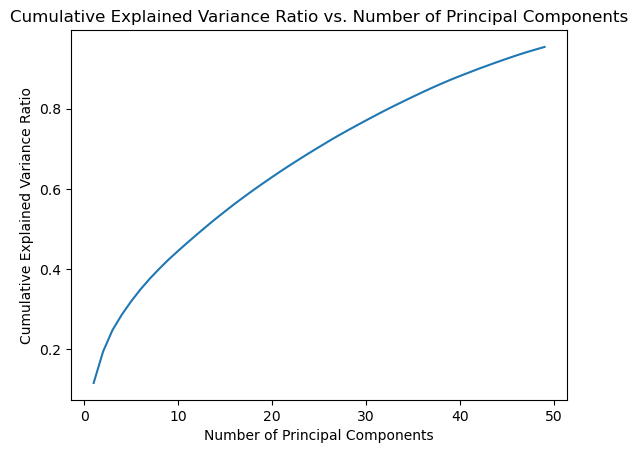

In [486]:
cum_sumed = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_sumed) + 1), cum_sumed)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.show()


In [487]:
# from above we observed that 
# around 95 % data can be explained  by 45 Components
# and 99 % by 50+
# to keep the fetures less an dmake less complexity I will choose 30

Fitting Incremental PCA

In [488]:
from sklearn.decomposition import IncrementalPCA
pca2=IncrementalPCA(n_components=pca_comp)
X=pca2.fit_transform(X)
X_test=pca2.transform(X_test)

In [489]:
pca2.get_feature_names_out()

array(['incrementalpca0', 'incrementalpca1', 'incrementalpca2',
       'incrementalpca3', 'incrementalpca4', 'incrementalpca5',
       'incrementalpca6', 'incrementalpca7', 'incrementalpca8',
       'incrementalpca9', 'incrementalpca10', 'incrementalpca11',
       'incrementalpca12', 'incrementalpca13', 'incrementalpca14',
       'incrementalpca15', 'incrementalpca16', 'incrementalpca17',
       'incrementalpca18', 'incrementalpca19', 'incrementalpca20',
       'incrementalpca21', 'incrementalpca22', 'incrementalpca23',
       'incrementalpca24', 'incrementalpca25', 'incrementalpca26',
       'incrementalpca27', 'incrementalpca28', 'incrementalpca29',
       'incrementalpca30', 'incrementalpca31', 'incrementalpca32',
       'incrementalpca33', 'incrementalpca34', 'incrementalpca35',
       'incrementalpca36', 'incrementalpca37', 'incrementalpca38',
       'incrementalpca39', 'incrementalpca40', 'incrementalpca41',
       'incrementalpca42', 'incrementalpca43', 'incrementalpca44',
     

Modeling

In [490]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgm
from xgboost import XGBClassifier

In [491]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, precision_recall_curve, roc_auc_score, make_scorer

Defining metrics for evaluations

In [492]:
def eva(m,X, y):
    print('accuracy_score', accuracy_score(m.predict(X),y))
    print('recall_score', recall_score(m.predict(X),y))
    print('precision_score', precision_score(m.predict(X),y))
    print('auc_roc', roc_auc_score(m.predict(X),y))

In [493]:
from sklearn.metrics import confusion_matrix
def eva2(model,X,y):
    con_rf=confusion_matrix(y,model.predict(X))
    true_positives = con_rf[1, 1]
    false_positives = con_rf[0, 1]
    true_negatives =  con_rf[0, 0]
    false_negatives = con_rf[1, 0]

# Calculate Sensitivity and Recall
    print('ses"=' ,true_positives / (true_positives + false_negatives))
    print('speci =', true_negatives / (true_negatives + false_positives))

Logistic Model

Training on default i.e. No hypertune

In [494]:
lr=LogisticRegression(random_state=42)
lr.fit(X,y)

LogisticRegression(random_state=42)

In [495]:
print('evaluation on Train dataset')
eva(lr, X, y)
eva2(lr, X, y)

evaluation on Train dataset
accuracy_score 0.7764458464773922
recall_score 0.7755311505696397
precision_score 0.7853653466375636
auc_roc 0.7764688198681982
ses"= 0.7853653466375636
speci = 0.7673156718799873


Decision Tree

In [496]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X,y)
print('evaluation on Train dataset')
eva(dt,X,y)
eva2(dt,X,y)

evaluation on Train dataset
accuracy_score 1.0
recall_score 1.0
precision_score 1.0
auc_roc 1.0
ses"= 1.0
speci = 1.0


In [497]:
rf=RandomForestClassifier(random_state=42).fit(X,y)
print('evaluation on Train dataset')
eva(rf,X,y)
eva2(rf,X,y)

evaluation on Train dataset
accuracy_score 1.0
recall_score 1.0
precision_score 1.0
auc_roc 1.0
ses"= 1.0
speci = 1.0


In [498]:
xg=XGBClassifier(random_state=42).fit(X,y)
print('evaluation on Train dataset')
eva(xg,X,y)
eva2(xg,X,y)

evaluation on Train dataset
accuracy_score 0.988459516298633
recall_score 0.9782288010580396
precision_score 0.9994283338530299
auc_roc 0.988815178506279
ses"= 0.9994283338530299
speci = 0.9772316203851473


In [499]:
# on default hyperparametrs least over fit model was logistic regression then XGBClassifier followed by RandomForestClassifier and then DecisionTreeClassifier

hypertuning Decision Tree, Random Forest and Xgboost

In [500]:
from sklearn.model_selection import  RandomizedSearchCV

Xgboost

In [501]:
para={
    'max_depth':[3,4,5,6,],
      # 'max_leaf_nodes':[10,20, 30,40,50],
    #   'n_estimators':[50,100, 150,200, 250],
      'learning_rate':[.001,.01,.1,1 ,10],
      # 'subsample':[.1,.5,.7]
      }

In [502]:
random_search_xg=RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=para, cv=3,scoring=['recall', 'precision',],refit='recall', n_jobs=-1,random_state=42)
random_search_xg.fit(X,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [3, 4, 5, 6]},
                   random_state=42, refit='recall',
                   scoring=['recall', 'precision'])

In [503]:
best_xg=random_search_xg.best_params_
final_xg=XGBClassifier(
    # n_estimators= best_xg['n_estimators'], 
# max_leaf_nodes= best_xg['max_leaf_nodes'],
 max_depth= best_xg['max_depth'],
 learing_rate= best_xg['learning_rate'],
#  subsample=best_xg['subsample']
 ).fit(X,y)

In [504]:
print('evaluation on Train dataset')
eva2(final_xg, X, y)
eva2(final_xg,X_test,y_test)

evaluation on Train dataset
ses"= 0.9994283338530299
speci = 0.9772316203851473
ses"= 0.4502262443438914
speci = 0.9339087546239211


Decison Tree

In [505]:
para_dt={'max_depth':[3,4,5,6,],
      'max_leaf_nodes':[10,20,30, 40],
      'min_samples_split':[250,200,150],
      'max_features':[10,20,30,40],
      # 'min_samples_leaf':[20,40,50,100],
      'min_impurity_decrease':[.2,.3,.5]
      
      }

In [506]:
random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=para_dt, cv=5,scoring=['recall', 'precision','roc_auc'],refit='roc_auc', n_jobs=-1,)
random_search_dt.fit(X,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [10, 20, 30, 40],
                                        'max_leaf_nodes': [10, 20, 30, 40],
                                        'min_impurity_decrease': [0.2, 0.3,
                                                                  0.5],
                                        'min_samples_split': [250, 200, 150]},
                   refit='roc_auc', scoring=['recall', 'precision', 'roc_auc'])

In [507]:
best_dt=random_search_dt.best_params_
final_dt=DecisionTreeClassifier(max_depth=best_dt['max_depth'],
      max_leaf_nodes=best_dt['max_leaf_nodes'],
      min_samples_split=best_dt['min_samples_split'],
      # min_samples_leaf=best_dt['min_samples_leaf'],
      min_impurity_decrease=best_dt['min_impurity_decrease'],
      max_features=best_dt['max_features'])
final_dt.fit(X,y)

DecisionTreeClassifier(max_depth=4, max_features=10, max_leaf_nodes=40,
                       min_impurity_decrease=0.2, min_samples_split=200)

In [508]:
print('evaluation on Train dataset')
eva2(final_dt, X, y)
eva2(final_dt, X_test, y_test)

evaluation on Train dataset
ses"= 1.0
speci = 0.0
ses"= 1.0
speci = 0.0


Decison tree is overfitting even after multiple custom hypertuning

In [509]:
para_rf={'max_depth':[3,4,5,6,],
      'max_leaf_nodes':[10,20, 40],
      'n_estimators':[20,50,100,120, 150],
      'max_features':[10,20,30,40]}

In [510]:
random_search_rf=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=para_rf, cv=5,scoring=['recall', 'precision'],refit='recall', n_jobs=-1)
random_search_rf.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [10, 20, 30, 40],
                                        'max_leaf_nodes': [10, 20, 40],
                                        'n_estimators': [20, 50, 100, 120,
                                                         150]},
                   refit='recall', scoring=['recall', 'precision'])

In [511]:
best_rf=random_search_rf.best_params_
final_rf=RandomForestClassifier(
    n_estimators=best_rf['n_estimators'],
    max_depth=best_rf['max_depth'],
    max_features=best_rf['max_features'],
    max_leaf_nodes= best_rf['max_leaf_nodes'])
final_rf.fit(X,y)

RandomForestClassifier(max_depth=4, max_features=10, max_leaf_nodes=40,
                       n_estimators=20)

In [512]:
print('evaluation on Train dataset')
eva(final_rf,X,y)

evaluation on Train dataset
accuracy_score 0.7572818086225026


recall_score 0.7431848000388745
precision_score 0.7948238228874337
auc_roc 0.7585404556863521


Random forest custom hypertune

In [513]:
para_rf1={'max_depth':[3,4,5,6],
      # 'max_leaf_nodes':[10,20, 30,40],
      'n_estimators':[20,50,75,100,120, 150, 175, 200,250],
      # 'max_features':[10,20,30,40],
      'class_weight':['balanced', 'balanced_subsample']
      }

random_search_rf1=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=para_rf, cv=5,scoring=['recall', 'precision'],refit='recall', n_jobs=-1)

In [514]:
random_search_rf1.fit(X,y)
best_rf=random_search_rf.best_params_

In [515]:

final_rf1=RandomForestClassifier(
    # n_estimators=best_rf['n_estimators'],
    max_depth=best_rf['max_depth'],
    # max_features=best_rf['max_features'],
    max_leaf_nodes= best_rf['max_leaf_nodes']
    )
final_rf1.fit(X,y)

RandomForestClassifier(max_depth=4, max_leaf_nodes=40)

In [516]:
print('evaluation on Train dataset')
eva(final_rf1, X, y)

evaluation on Train dataset
accuracy_score 0.7796529968454259
recall_score 0.7615354975435893
precision_score 0.8216921317950318
auc_roc 0.7814796367217889


TEsting

Logistic model

In [538]:
print(('for Logistic model'))
print('train')
rint('------')
print(eva2(lr, X, y)),
print('train')
print(eva2(lr,X_test,y_test))


for Logistic model
train


TypeError: eva2() takes 3 positional arguments but 4 were given

Decision Tree

In [518]:
print(('for Desicion tree model'))

eva2(final_dt, X, y)
eva2(final_dt,X_test,y_test)

for Desicion tree model
ses"= 1.0
speci = 0.0
ses"= 1.0
speci = 0.0


XGboost

In [519]:
print(('for XGboost model'))
eva2(final_xg, X, y)
eva2(final_xg,X_test,y_test)

for XGboost model
ses"= 0.9994283338530299
speci = 0.9772316203851473
ses"= 0.4502262443438914
speci = 0.9339087546239211


Both Decison tree and Xg bosst are overfit due to high difference in test and train performaace

Random Forestm

In [520]:
print(('for Random forest  model'))
eva2(final_rf, X, y)
eva2(final_rf,X_test,y_test)

for Random forest  model
ses"= 0.7948238228874337
speci = 0.7188530694754761
ses"= 0.7601809954751131
speci = 0.7163995067817509


In [521]:
print(('for Random forest 1 model'))

eva2(final_rf1, X, y)
eva2(final_rf1,X_test,y_test)

for Random forest 1 model
ses"= 0.8216921317950318
speci = 0.7366209171188425
ses"= 0.7669683257918553
speci = 0.730826140567201


final model for prediction is Random forestbhaving decent prediction
Model 1 i.e final_rf is of better evaluation but its run time is high but the difference between test and train is .07
while model RF2 super light  on computational time but have a Computation difference of .10

Impotant featuures

In [522]:
X2

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,av_total_rech_num_6_7,av_arpu_6_7,av_onnet_mou_6_7,av_og_others_6_7,av_spl_ic_mou_6_7,av_std_ic_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_ic_others_6_7,av_count_rech_2g_6_7,av_offnet_mou_6_7,av_vbc_3g_6_7,av_roam_ic_mou_6_7,av_last_day_rch_amt_6_7,av_count_rech_3g_6_7,av_av_rech_amt_data_6_7,av_std_ic_mou_6_7,av_spl_og_mou_6_7,av_max_rech_amt_6_7,av_max_rech_data_6_7,av_loc_og_mou_6_7,av_monthly_2g_6_7,av_isd_ic_mou_6_7,av_std_og_t2f_mou_6_7,av_isd_og_mou_6_7,av_loc_ic_mou_6_7,av_roam_og_mou_6_7,av_std_og_mou_6_7,av_sachet_3g_6_7,av_std_ic_t2t_mou_6_7,av_total_rech_data_6_7,av_monthly_3g_6_7,av_sachet_2g_6_7,av_vol_2g_mb_6_7
39999,169.378,15.18,18.01,0.00,0.0,0.00,33.19,0.0,0.00,0.0,0.00,0.0,43.34,0.00,0.00,0.00,0.0,0.00,0.00,6.0,154.0,20.0,1.0,154.0,1.0,0.0,154.0,10.44,1.0,0.0,0.0,0.0,1.282192,352.58,5.5,227.4995,7.640,0.0,0.04,0.000,0.000,0.480,2.0,6.500,171.675,0.000,154.0,0.0,77.0,0.240,0.000,154.0,154.0,13.510,0.5,0.000,0.0,0.0,18.610,0.000,0.630,0.0,0.000,2.0,0.0,0.5,24.900
74412,52.763,30.63,25.98,12.53,7.5,0.43,46.65,0.0,2.46,0.0,1.21,0.0,2.70,0.00,0.00,0.00,0.0,0.00,0.00,5.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.887671,0.00,17.0,547.3430,155.680,0.0,0.00,0.000,1.065,0.090,2.5,334.280,0.000,0.000,50.0,0.0,57.5,23.560,8.765,58.5,23.0,373.385,0.0,5.770,0.0,0.0,205.745,0.000,102.345,0.0,4.315,2.5,0.0,2.5,0.815
8556,0.000,0.00,637.41,0.00,0.0,0.00,42.34,0.0,0.00,0.0,0.00,0.0,92.73,0.00,0.00,66.36,0.0,0.00,0.00,0.0,130.0,20.0,1.0,17.0,1.0,0.0,17.0,47.81,0.0,1.0,0.0,0.0,1.553425,0.00,0.0,809.5810,0.000,0.0,0.00,0.000,0.000,0.000,0.5,186.700,0.000,0.000,20.0,0.0,8.5,38.875,0.000,43.0,8.5,30.660,0.0,0.000,0.0,0.0,34.875,0.000,0.000,0.0,20.560,0.5,0.0,0.5,14.655
48019,354.834,27.46,79.43,0.00,0.0,0.00,106.89,0.0,0.00,0.0,0.00,0.0,211.18,0.00,1.88,1.88,0.0,0.00,0.00,21.0,30.0,20.0,0.0,25.0,0.0,0.0,225.0,30.80,0.0,0.0,0.0,0.0,2.824658,267.49,0.0,431.4525,42.770,0.0,0.00,0.265,0.850,0.000,0.0,340.020,137.380,0.000,27.5,0.0,237.5,0.265,2.355,31.5,25.0,377.910,0.0,0.000,0.0,0.0,187.180,0.000,2.520,0.0,0.000,0.0,0.0,0.0,15.990
71135,0.000,306.48,0.00,0.00,0.0,0.00,0.00,0.0,192.56,0.0,11.03,0.0,0.00,23.39,0.00,52.69,0.0,0.03,0.00,11.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,6.454795,0.00,13.5,980.9445,265.225,0.0,0.00,0.000,0.175,0.000,0.0,438.965,0.000,0.000,130.0,0.5,45.5,35.675,5.850,130.0,45.5,0.000,0.0,0.000,0.0,0.0,0.000,0.000,134.620,0.5,3.995,0.5,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75843,148.625,28.43,20.28,0.00,0.0,0.00,48.71,0.0,0.00,0.0,0.00,0.0,156.04,0.00,0.00,0.00,0.0,0.00,0.00,7.0,98.0,10.0,1.0,98.0,1.0,0.0,98.0,70.16,0.0,1.0,0.0,0.0,3.271233,145.09,12.5,242.9130,59.110,0.0,0.00,0.000,1.155,0.000,0.5,47.955,22.490,0.000,15.0,0.0,98.0,0.150,1.155,70.5,45.5,105.585,0.0,0.000,0.0,0.0,301.020,0.000,0.000,0.0,0.000,1.5,0.0,0.5,0.360
18770,336.391,637.89,385.19,2.38,0.0,0.00,363.23,0.0,659.86,0.0,0.00,0.0,349.79,27.31,0.00,0.00,0.0,7.83,0.00,6.0,144.0,130.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.150685,0.00,9.0,466.9825,370.630,0.0,0.00,1.500,0.000,0.000,2.0,454.495,0.000,2.405,60.0,0.0,46.0,49.665,2.965,152.5,23.0,441.150,0.0,0.000,0.0,0.0,272.020,5.825,375.165,0.0,12.605,2.0,0.0,2.0,0.000
2955,713.382,0.00,230.38,0.00,0.0,0.00,482.36,0.0,589.14,0.0,0.00,0.0,210.21,0.24,0.21,0.76,0.0,0.00,0.21,7

In [523]:
from sklearn.feature_selection import RFECV, RFE
lr2=LogisticRegression()
rfecv=RFECV(lr2, cv=2)
rfecv.fit(X2,y2)


RFECV(cv=2, estimator=LogisticRegression())

In [524]:
col=X2.columns[rfecv.ranking_==1]
X2=X2[col]
X2.shape

(19952, 39)

In [525]:
# fea_imp=pd.DataFrame()
# fea_imp['feature name']=X2.columns
# fea_imp['ranking']=rfecv.ranking_
# col=X2.columns[rfecv.ranking_==1]

In [526]:
lr3=LogisticRegression()
rfe=RFE(lr3,n_features_to_select=20)
rfecv.fit(X2,y2)

col=X2.columns[rfecv.support_]
X2=X2[col]
X2.shape

(19952, 36)

In [527]:
lr=LogisticRegression()
rfe=RFE(lr2, n_features_to_select=15)
rfe.fit(X2,y2)
col=X2.columns[rfe.support_]
X2=X2[col]

In [528]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [529]:
X2_cons=sm.add_constant(X2)
m1=sm.GLM(y2,X2_cons, family=sm.families.Binomial())
m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19936
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4024.4
Date:                Mon, 05 Feb 2024   Deviance:                       8048.8
Time:                        21:00:03   Pearson chi2:                 2.28e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03781
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0954      0.060    -34.730      0.000      -2.214      -1.977
roam_ic_mou_8              0.1416      0.008     16.850      0.000       0.125       0.158
loc_og_t2c_mou_8          -0.1640      0.046     -3.568      0.000      -0.254      -0.074
std_og_t2f_mou_8          -0.8664      0.304     -2.847      0.004      -1.463      -0.270
std_ic_t2f_mou_8          -0.4362      0.081     -5.379      0.000      -0.595      -0.277
ic_others_8               -1.8283      0.279     -6.564      0.000      -2.374      -1.282
total_rech_data_8         -0.4406      0.041    -10.710      0.000      -0.521      -0.360
aon                       -0.1034      0.017     -5.988      0.000      -0.137      -0.070
av_og_others_6_7           0.1775      0.149      1.191      0.234      -0.115       0.470
av_std_ic_t2f_mou_6_7     -0.2447      0.076     -3.227      0.001      -0.393      -0.096
av_loc_og_t2c_mou_6_7      0.0904      0.049      1.849      0.065      -0.005       0.186
av_count_rech_2g_6_7      -0.1421      0.130     -1.090      0.276      -0.398       0.114
av_monthly_2g_6_7         -0.5935      0.188     -3.157      0.002      -0.962      -0.225
av_std_og_t2f_mou_6_7     -0.7563      0.277     -2.725      0.006      -1.300      -0.212
av_total_rech_data_6_7    -0.1072      0.051     -2.095      0.036      -0.207      -0.007
av_sachet_2g_6_7           0.2903      0.126      2.312      0.021       0.044       0.536
==========================================================================================
"""

In [530]:
X2.drop(columns=['av_count_rech_2g_6_7'], inplace=True)


In [531]:
X2_cons=sm.add_constant(X2)
m2=sm.GLM(y2,X2_cons, family=sm.families.Binomial())
m2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19937
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4025.0
Date:                Mon, 05 Feb 2024   Deviance:                       8050.0
Time:                        21:00:03   Pearson chi2:                 2.29e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03776
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0959      0.060    -34.739      0.000      -2.214      -1.978
roam_ic_mou_8              0.1415      0.008     16.846      0.000       0.125       0.158
loc_og_t2c_mou_8          -0.1644      0.046     -3.575      0.000      -0.254      -0.074
std_og_t2f_mou_8          -0.8651      0.304     -2.842      0.004      -1.462      -0.269
std_ic_t2f_mou_8          -0.4361      0.081     -5.377      0.000      -0.595      -0.277
ic_others_8               -1.8302      0.279     -6.569      0.000      -2.376      -1.284
total_rech_data_8         -0.4409      0.041    -10.701      0.000      -0.522      -0.360
aon                       -0.1035      0.017     -5.998      0.000      -0.137      -0.070
av_og_others_6_7           0.1744      0.149      1.171      0.242      -0.118       0.466
av_std_ic_t2f_mou_6_7     -0.2438      0.076     -3.215      0.001      -0.392      -0.095
av_loc_og_t2c_mou_6_7      0.0904      0.049      1.849      0.065      -0.005       0.186
av_monthly_2g_6_7         -0.7173      0.153     -4.688      0.000      -1.017      -0.417
av_std_og_t2f_mou_6_7     -0.7510      0.277     -2.707      0.007      -1.295      -0.207
av_total_rech_data_6_7    -0.1212      0.050     -2.432      0.015      -0.219      -0.024
av_sachet_2g_6_7           0.1667      0.056      2.986      0.003       0.057       0.276
==========================================================================================
"""

In [532]:
X2.drop(columns=['av_og_others_6_7'], inplace=True)

In [533]:
X2_cons=sm.add_constant(X2)
m3=sm.GLM(y2,X2_cons, family=sm.families.Binomial())
m3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19938
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4025.7
Date:                Mon, 05 Feb 2024   Deviance:                       8051.3
Time:                        21:00:03   Pearson chi2:                 2.29e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03769
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0841      0.059    -35.095      0.000      -2.201      -1.968
roam_ic_mou_8              0.1416      0.008     16.859      0.000       0.125       0.158
loc_og_t2c_mou_8          -0.1632      0.046     -3.554      0.000      -0.253      -0.073
std_og_t2f_mou_8          -0.8692      0.304     -2.856      0.004      -1.466      -0.273
std_ic_t2f_mou_8          -0.4361      0.081     -5.376      0.000      -0.595      -0.277
ic_others_8               -1.8319      0.279     -6.574      0.000      -2.378      -1.286
total_rech_data_8         -0.4414      0.041    -10.706      0.000      -0.522      -0.361
aon                       -0.1039      0.017     -6.025      0.000      -0.138      -0.070
av_std_ic_t2f_mou_6_7     -0.2453      0.076     -3.234      0.001      -0.394      -0.097
av_loc_og_t2c_mou_6_7      0.0923      0.049      1.889      0.059      -0.003       0.188
av_monthly_2g_6_7         -0.7154      0.153     -4.677      0.000      -1.015      -0.416
av_std_og_t2f_mou_6_7     -0.7481      0.277     -2.697      0.007      -1.292      -0.204
av_total_rech_data_6_7    -0.1215      0.050     -2.438      0.015      -0.219      -0.024
av_sachet_2g_6_7           0.1691      0.056      3.031      0.002       0.060       0.278
==========================================================================================
"""

In [534]:
X2.drop(columns=['av_loc_og_t2c_mou_6_7'], inplace=True)

In [535]:
X2_cons=sm.add_constant(X2)
m4=sm.GLM(y2,X2_cons, family=sm.families.Binomial())
m4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19939
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4027.4
Date:                Mon, 05 Feb 2024   Deviance:                       8054.8
Time:                        21:00:03   Pearson chi2:                 2.28e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03753
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0574      0.057    -35.795      0.000      -2.170      -1.945
roam_ic_mou_8              0.1414      0.008     16.841      0.000       0.125       0.158
loc_og_t2c_mou_8          -0.1558      0.046     -3.417      0.001      -0.245      -0.066
std_og_t2f_mou_8          -0.8691      0.304     -2.855      0.004      -1.466      -0.273
std_ic_t2f_mou_8          -0.4366      0.081     -5.380      0.000      -0.596      -0.278
ic_others_8               -1.8306      0.279     -6.572      0.000      -2.377      -1.285
total_rech_data_8         -0.4407      0.041    -10.686      0.000      -0.522      -0.360
aon                       -0.1046      0.017     -6.073      0.000      -0.138      -0.071
av_std_ic_t2f_mou_6_7     -0.2463      0.076     -3.249      0.001      -0.395      -0.098
av_monthly_2g_6_7         -0.7132      0.153     -4.663      0.000      -1.013      -0.413
av_std_og_t2f_mou_6_7     -0.7533      0.278     -2.715      0.007      -1.297      -0.209
av_total_rech_data_6_7    -0.1245      0.050     -2.499      0.012      -0.222      -0.027
av_sachet_2g_6_7           0.1736      0.056      3.117      0.002       0.064       0.283
==========================================================================================
"""

In [536]:

# vif = pd.DataFrame()

# vif['feat_name'] = X2.columns

# vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
# vif.sort_values(by='VIF', ascending=False)

# # top_feature_to_remove = vif_sorted.iloc[0]['feat_name']
# # X2 = X2.drop(columns=[top_feature_to_remove],inplace=True)
# print("\nFeature matrix after removing top feature with VIF > 5:")
# print(vif)


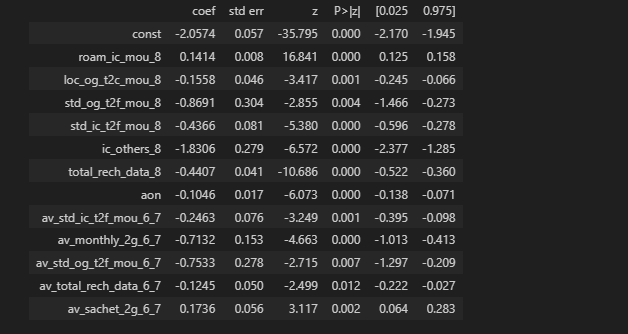

"We can observe that data usage and call activities, especially STD charges, play a significant role in user behavior. Based on this, we can formulate the following strategies:

1. **Incoming Calls:** There is a large number of people who use services primarily for receiving calls. We can manage recharges for them by minimizing call receiving charges if applied or providing recharges that support this usage pattern.

2. **STD Calls (Incoming and Outgoing):** STD calls, both incoming and outgoing, contribute to the main concerns. To address this, we can consider reducing the charges for both incoming and outgoing calls. Additionally, offering special recharge plans based on different time periods can be a viable approach.

3. **Data Usage:** Data usage, indicated by variables like `total_rech_data_8`, `av_total_rech_data_6_7`, is another major factor. Introducing high-data packs with slightly lower costs or offering special recharges to the highest data users can be effective in meeting their needs.

4. **Age on Network:** To encourage customers to stay on our network for a longer duration, we can offer free hampers or special recharges as incentives. This can contribute to customer retention and loyalty."